In [1]:
from classy import Class
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import fisher_mod as fmod

In [2]:
run_5e6 = True
run_3e6 = True
run_1e6 = True

num = 25
master = {'run': False,
          'dmeff_mass': 1.,
          'fname': '1GeV_5e6step_num25',
          'survey': 'planck',
          'polarization': True,
          'param':['output','lensing','omega_b','omega_dmeff','H0','n_s','A_s','tau_reio','cc_dmeff_p'],
          'cv':['tCl,pCl','no',0.0222,0.1197,67.31,0.9655,2.2e-9,0.06,0.],
          'delta':[0.00022,0.0012,0.67,0.0097,0.022e-9,0.0006,5e6]}

deg = 6
if run_5e6 == True:
    print '1Gev PLANCK CONSTRAINTS -- 5e6'
    fmod.forecast(master)
    ell,cl_tt_5e6,cl_te_5e6,cl_ee_5e6 = fmod.output_cl(master)
    deriv_tt_5e6,deriv_te_5e6,deriv_ee_5e6 = fmod.output_deriv(master)
    
if run_3e6 == True:
    print '1GeV PLANCK CONSTRAINTS -- 3e6'
    master.update({'fname': '1GeV_3e6step_num25'})
    master.update({'delta':[0.00022,0.0012,0.67,0.0097,0.022e-9,0.0006,3e6]})
    fmod.forecast(master)
    ell,cl_tt_3e6,cl_te_3e6,cl_ee_3e6 = fmod.output_cl(master)
    deriv_tt_3e6,deriv_te_3e6,deriv_ee_3e6 = fmod.output_deriv(master)

if run_1e6 == True:
    print '1GeV PLANCK CONSTRAINTS -- 1e6'
    master.update({'fname': '1GeV_1e6step_num25'})
    master.update({'delta':[0.00022,0.0012,0.67,0.0097,0.022e-9,0.0006,1e6]})
    fmod.forecast(master)
    ell,cl_tt_1e6,cl_te_1e6,cl_ee_1e6 = fmod.output_cl(master)
    deriv_tt_1e6,deriv_te_1e6,deriv_ee_1e6 = fmod.output_deriv(master)
    
mod = ell*(ell+1.0)/(2*np.pi)
fiducial_tt = cl_tt_5e6[6,2:,0]*mod[6,2:,0]

1Gev PLANCK CONSTRAINTS -- 5e6
omega_b :  0.00015696910304
omega_dmeff :  0.0015480601251
H0 :  0.688788070598
n_s :  0.0044160899462
A_s :  2.06985421934e-11
tau_reio :  0.00446878533974
cc_dmeff_p :  8489170.07175
p_cc :  2.34848731417e-24
1GeV PLANCK CONSTRAINTS -- 3e6
omega_b :  0.000172943150982
omega_dmeff :  0.00157272513764
H0 :  0.720346989532
n_s :  0.00412332161108
A_s :  2.17925787903e-11
tau_reio :  0.00447068466353
cc_dmeff_p :  16180227.7536
p_cc :  8.53153174156e-24
1GeV PLANCK CONSTRAINTS -- 1e6
omega_b :  0.000177568923305
omega_dmeff :  0.00160421842876
H0 :  0.734864642593
n_s :  0.0043349167835
A_s :  2.05030390268e-11
tau_reio :  0.00447704009378
cc_dmeff_p :  23367109.9619
p_cc :  1.77937610645e-23


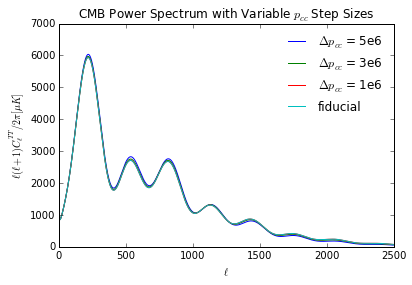

In [8]:
plt.plot(cl_tt_5e6[6,2:,24]*mod[6,2:,24],label = '$\Delta p_{cc}$ = 5e6')
plt.plot(cl_tt_3e6[6,2:,24]*mod[6,2:,24],label = '$\Delta p_{cc}$ = 3e6')
plt.plot(cl_tt_1e6[6,2:,24]*mod[6,2:,24],label = '$\Delta p_{cc}$ = 1e6')
plt.plot(fiducial_tt,label = 'fiducial')
plt.legend(frameon = False)
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_{\ell}^{TT}/2\pi[\mu K]$')
plt.title('CMB Power Spectrum with Variable $p_{cc}$ Step Sizes')
plt.show()

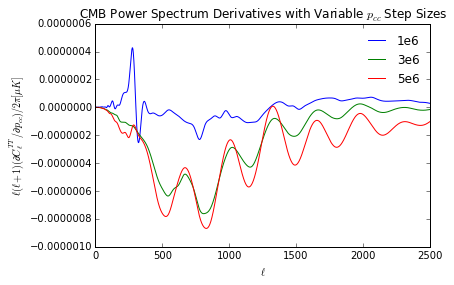

In [4]:
plt.plot(ell[6,2:,24],deriv_tt_1e6[6,2:]*mod[6,2:,24],label = '1e6')
plt.plot(ell[6,2:,24],deriv_tt_3e6[6,2:]*mod[6,2:,24],label = '3e6')
plt.plot(ell[6,2:,24],deriv_tt_5e6[6,2:]*mod[6,2:,24],label = '5e6')
plt.legend(frameon = False,loc = 'upper right')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)(\partial{C_{\ell}^{TT}}/\partial{p_{cc}})/2\pi[\mu K]$')
plt.title('CMB Power Spectrum Derivatives with Variable $p_{cc}$ Step Sizes')
plt.show()

In [5]:
fsky = 0.5
noise = fmod.noise(ell,40.*np.pi/10800,7.*np.pi/10800)
prefactor = np.sqrt(2./((2.*ell[6,2:,0]+1.)*fsky))
#power spectrum modified by p_cc
cl_pcc_1e6 = cl_tt_1e6[6,2:,24]*mod[6,2:,24]
cl_pcc_3e6 = cl_tt_3e6[6,2:,24]*mod[6,2:,24]
cl_pcc_5e6 = cl_tt_5e6[6,2:,24]*mod[6,2:,24]
#fractional change in cl due to p_cc
Delta_cl_1e6 = (fiducial_tt-cl_pcc_1e6)/fiducial_tt
Delta_cl_3e6 = (fiducial_tt-cl_pcc_3e6)/fiducial_tt
Delta_cl_5e6 = (fiducial_tt-cl_pcc_5e6)/fiducial_tt
#cosmic variance noise
delta_cv = fiducial_tt*prefactor
#shot noise
delta_noise = noise*prefactor*mod[6,2:,24]
#total error bars on Delta_cl
delta_cl = np.sqrt(np.square(delta_cv)+np.square(delta_noise))/fiducial_tt

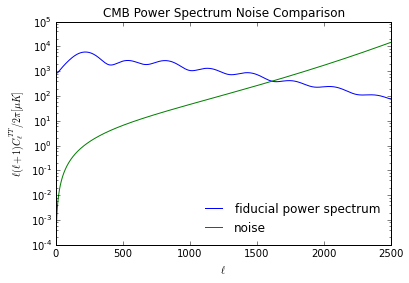

In [6]:
plt.plot(ell[6,2:,0],cl_tt_5e6[6,2:,0]*mod[6,2:,0],label = 'fiducial power spectrum')
plt.plot(ell[0,2:,12],mod[6,2:,24]*noise,label = 'noise')
plt.legend(frameon = False, loc = 'lower right')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_{\ell}^{TT}/2\pi[\mu K]$')
plt.title('CMB Power Spectrum Noise Comparison')
plt.show()

/Users/etrott12/Downloads/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


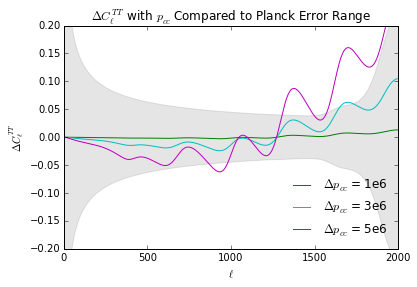

In [7]:
plt.plot(ell[6,2:,0],Delta_cl_1e6,'g',label = '$\Delta p_{cc}$ = 1e6')
plt.plot(ell[6,2:,0],Delta_cl_3e6,'c',label = '$\Delta p_{cc}$ = 3e6')
plt.plot(ell[6,2:,0],Delta_cl_5e6,'m',label = '$\Delta p_{cc}$ = 5e6')
plt.fill_between(ell[6,2:,0],delta_cl,-delta_cl,alpha = 0.1,color = 'k')
plt.ylim(-0.2,0.2)
plt.xlim(0,2000)
plt.xlabel('$\ell$')
plt.ylabel('$\Delta C_{\ell}^{TT}$')
plt.title('$\Delta C_{\ell}^{TT}$ with $p_{cc}$ Compared to Planck Error Range')
plt.legend(frameon = False,loc = 'lower right')
plt.show()